In [1]:
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2017)

In [2]:
x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],[9.779],[6.182],[7.59],[2.167],[7.042],[10.791],[5.313],[7.997],[3.1]], dtype=np.float32)

y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],[3.366],[2.596],[2.53],[1.221],[2.827],[3.465],[1.65],[2.904],[1.3]], dtype=np.float32)

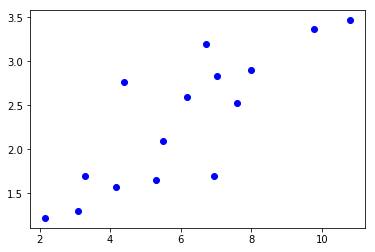

In [3]:


plt.plot(x_train, y_train, 'bo')

In [4]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

w = Variable(torch.randn(1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)

In [5]:
x_train = Variable(x_train)
y_train = Variable(y_train)

def linear_model(x):
    return x * w + b

In [6]:
y_ = linear_model(x_train)

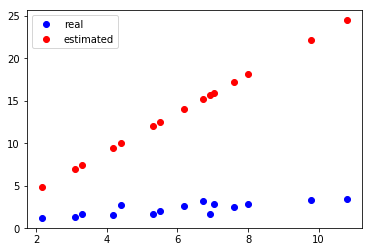

In [7]:
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [8]:
def get_loss(y_, y):
    return torch.mean((y_ - y_train) ** 2)

loss = get_loss(y_, y_train)

In [9]:
print(loss)

tensor(153.3520, grad_fn=<MeanBackward1>)


In [10]:
loss.backward()

In [11]:
print(w.grad)
print(b.grad)

tensor([161.0043])
tensor([22.8730])


In [12]:
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data

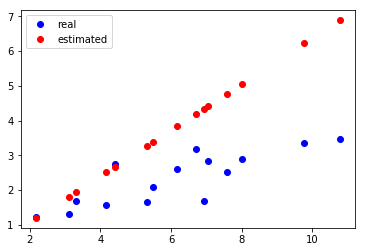

In [13]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [14]:
for e in range(10):
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    
    w.grad.zero_()
    b.grad.zero_()
    
    loss.backward()
    
    w.data = w.data - 1e-2 * w.grad.data
    b.data = b.data - 1e-2 * b.grad.data
    print('epoch:{}, loss:{}'.format(e, loss.data[0]))

epoch:0, loss:3.135772228240967
epoch:1, loss:0.355089008808136
epoch:2, loss:0.30295446515083313
epoch:3, loss:0.30131959915161133
epoch:4, loss:0.3006228804588318
epoch:5, loss:0.2999469041824341
epoch:6, loss:0.299274742603302
epoch:7, loss:0.2986060082912445
epoch:8, loss:0.2979407012462616
epoch:9, loss:0.29727888107299805


G:\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:12: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if sys.path[0] == '':


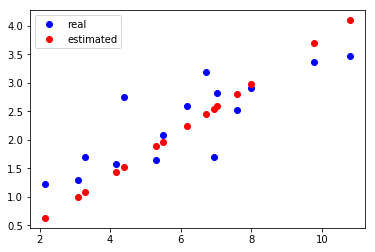

In [15]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(),'ro', label='estimated')
plt.legend()

In [16]:
################################################################

In [17]:
w_target = np.array([0.5,3,2.4])
b_target = np.array([0.9])

f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x ^3'.format(b_target[0], w_target[0], w_target[1], w_target[2])

print(f_des)

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x ^3


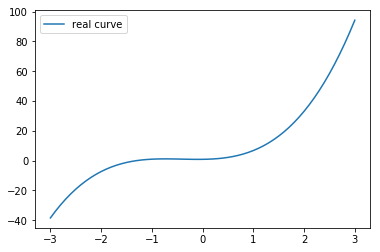

In [18]:
x_sample = np.arange(-3,3.1,0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3

plt.plot(x_sample, y_sample, label='real curve')
plt.legend()

In [19]:
x_train = np.stack([x_sample ** i for i in range(1, 4)], axis=1)
x_train = torch.from_numpy(x_train).float()

y_train = torch.from_numpy(y_sample).float().unsqueeze(1)

In [20]:
w = Variable(torch.randn(3,1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)

x_train = Variable(x_train)
y_train = Variable(y_train)

def multi_linear(x):
    return torch.mm(x, w) + b

(61,)
torch.Size([61, 1])
(61,)
(61,)


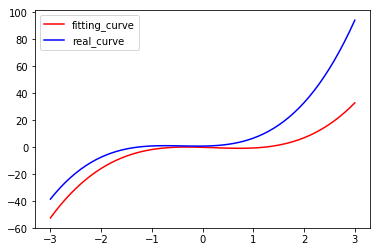

In [21]:
y_pred = multi_linear(x_train)

print(x_train.data.numpy()[:,0].shape)
print(y_pred.shape)
print(y_pred.data.numpy().squeeze().shape)
print(y_sample.shape)

plt.plot(x_train.data.numpy()[:,0], y_pred.data.numpy().squeeze(), label='fitting_curve', color='r')
plt.plot(x_train.data.numpy()[:,0], y_sample, label='real_curve', color='b')
plt.legend()

In [22]:
def get_loss(y_, y):
    return torch.mean((y_ - y_train) ** 2)

loss = get_loss(y_pred, y_train)
print(loss)

tensor(413.9844, grad_fn=<MeanBackward1>)


In [23]:
loss.backward()

In [24]:
print(w.grad)
print(b.grad)

tensor([[ -34.1391],
        [-146.6133],
        [-215.9149]])
tensor([-27.0838])


In [25]:
w.data = w.data - 0.01 * w.grad.data
b.data = b.data - 0.01 * b.grad.data

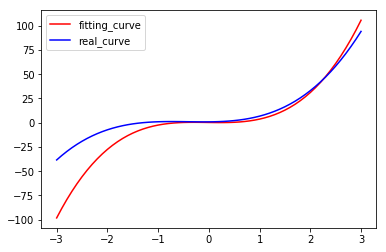

In [26]:
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:,0], y_pred.data.numpy().squeeze(), label='fitting_curve', color='r')
plt.plot(x_train.data.numpy()[:,0], y_sample, label='real_curve', color='b')
plt.legend()

In [27]:
for e in range(100):
    y_pred = multi_linear(x_train)
    loss = get_loss(y_pred, y_train)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    loss.backward()
    
    w.data = w.data - 0.001 * w.grad.data
    b.data = b.data - 0.001 * b.grad.data
    
    if(e + 1) % 20 == 0:
        print('epoch{}, Loss:{:.5f}'.format(e+1, loss.data[0]))

epoch20, Loss:33.31690
epoch40, Loss:8.53680
epoch60, Loss:2.72630
epoch80, Loss:1.34238
epoch100, Loss:0.99259


G:\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:14: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


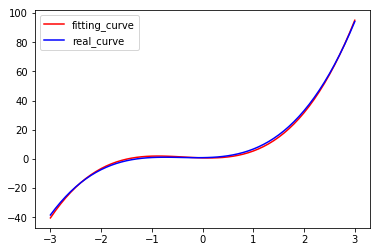

In [28]:
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:,0], y_pred.data.numpy().squeeze(), label='fitting_curve', color='r')
plt.plot(x_train.data.numpy()[:,0], y_sample, label='real_curve', color='b')
plt.legend()